### Load dataset

In [2]:
data.raw = read.table("crabs.dat.txt", header = TRUE)

In [3]:
head(data.raw)

crab,sat,y,weight,width,color,spine
1,8,1,3.05,28.3,2,3
2,0,0,1.55,22.5,3,3
3,9,1,2.30,26.0,1,1
4,0,0,2.10,24.8,3,3
5,4,1,2.60,26.0,3,3
6,0,0,2.10,23.8,2,3


Here *y* is whether a female crab has a satellite (1=yes, 0=no) and  
*weight* is in grams, rather than kg as in the text. Also, *color* has  
values 1-5 with 1=light; there were no crabs of color 1, so in the  
text, color was re-coded as color - 1 to give values 1, 2, 3, 4.)

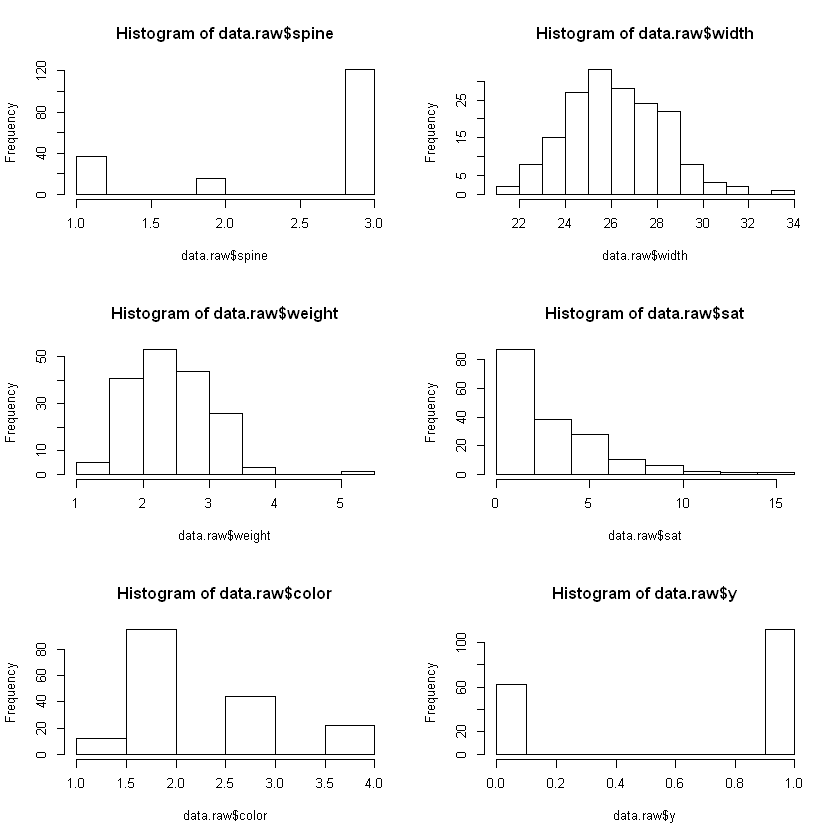

In [4]:
par(mfrow=c(3,2))
hist(data.raw$spine)
hist(data.raw$width)
hist(data.raw$weight)
hist(data.raw$sat)
hist(data.raw$color)
hist(data.raw$y)

In [5]:
data.raw$color = factor(data.raw$color)
data.raw$y = factor(data.raw$y)

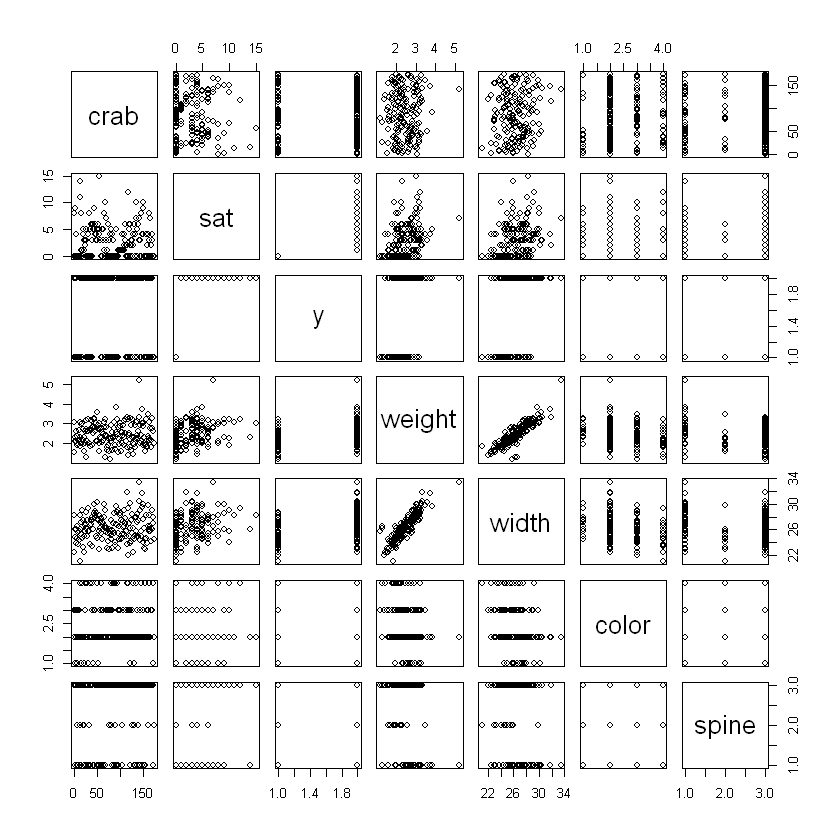

In [6]:
plot(data.raw)

### Examine each variable

Loading required package: MASS
Loading required package: Matrix
Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is C:/Users/emara/coding_workspace/EPFL-Applied-Biostatistics/assignment3



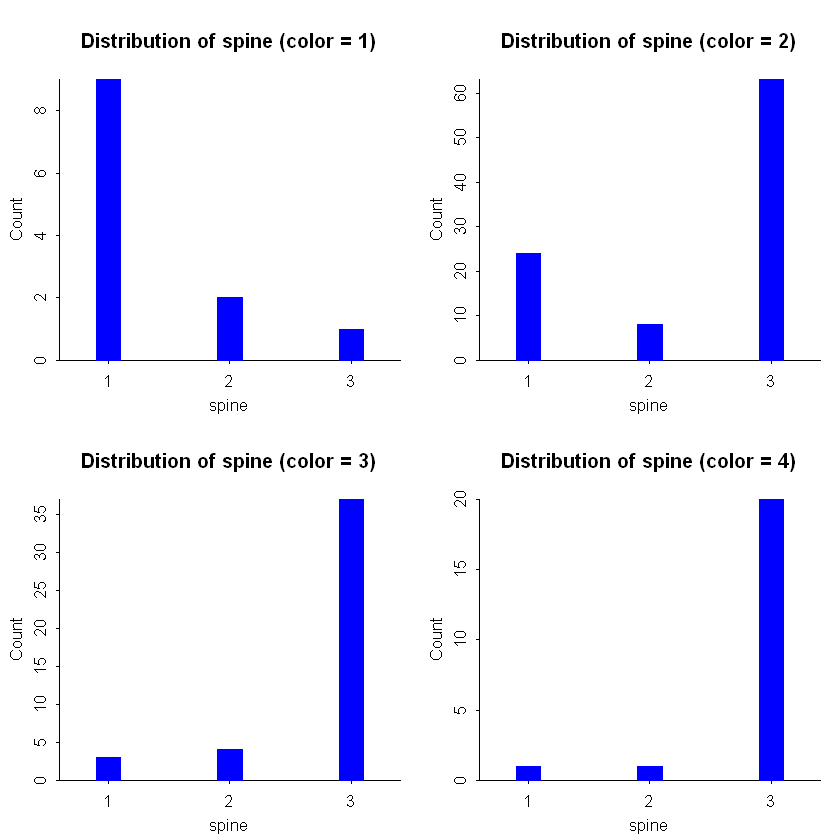

In [7]:
library(arm)

par(mfrow=c(2,2))
discrete.histogram(data.raw$spine[data.raw$color==1], main = "Distribution of spine (color = 1)", xlab = "spine", freq = TRUE)
discrete.histogram(data.raw$spine[data.raw$color==2], main = "Distribution of spine (color = 2)", xlab = "spine", freq = TRUE)
discrete.histogram(data.raw$spine[data.raw$color==3], main = "Distribution of spine (color = 3)", xlab = "spine", freq = TRUE)
discrete.histogram(data.raw$spine[data.raw$color==4], main = "Distribution of spine (color = 4)", xlab = "spine", freq = TRUE)

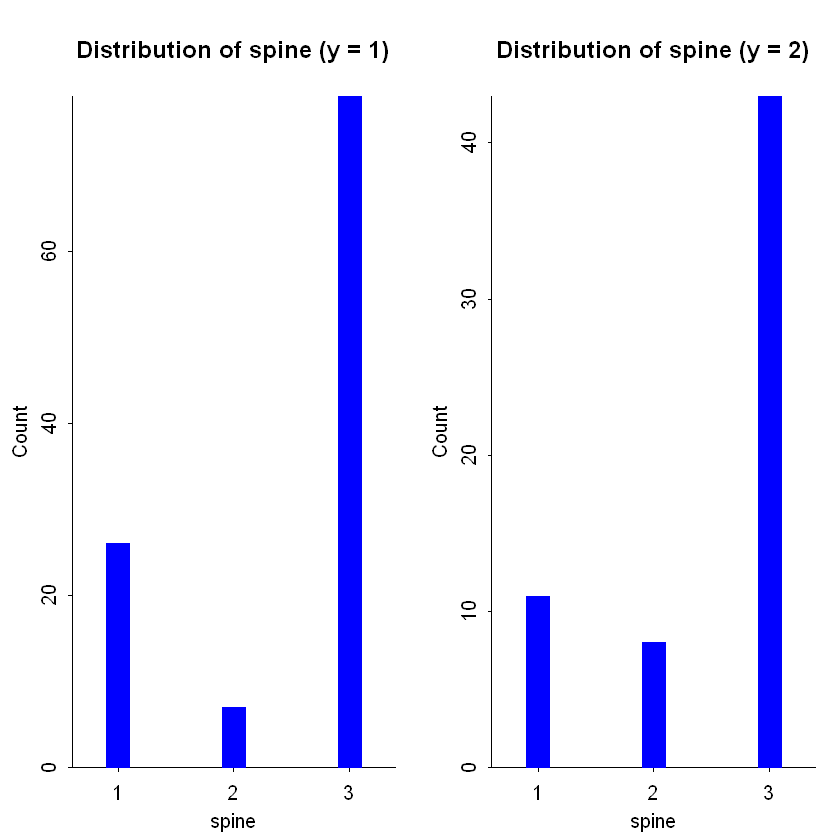

In [11]:
par(mfrow=c(2,2))
discrete.histogram(data.raw$spine[data.raw$y==1], main = "Distribution of spine (y = 1)", xlab = "spine", freq = TRUE)
discrete.histogram(data.raw$spine[data.raw$y==0], main = "Distribution of spine (y = 2)", xlab = "spine", freq = TRUE)

In [1]:
par(mfrow=c(2,2))
plot(data.raw$spine ~ data.raw$width, type = 'p', col = 'aquamarine3', ylab = 'spine', xlab = 'width')
points(x = c(mean(data.raw$width[data.raw$spine == 3]), mean(data.raw$width[data.raw$spine == 2]), mean(data.raw$width[data.raw$spine == 1])), y = c(3, 2, 1), type = 'b', col = 'red')

plot(data.raw$spine ~ data.raw$weight, type = 'p', col = 'aquamarine3', ylab = 'spine', xlab = 'weight')
points(x = c(mean(data.raw$weight[data.raw$spine == 3]), mean(data.raw$weight[data.raw$spine == 2]), mean(data.raw$weight[data.raw$spine == 1])), y = c(3, 2, 1), type = 'b', col = 'red')

plot(data.raw$spine ~ data.raw$sat, type = 'p', col = 'aquamarine3', ylab = 'spine', xlab = 'sat')
points(x = c(mean(data.raw$sat[data.raw$spine == 3]), mean(data.raw$sat[data.raw$spine == 2]), mean(data.raw$sat[data.raw$spine == 1])), y = c(3, 2, 1), type = 'o', col = 'red')

ERROR: Error in eval(predvars, data, env): object 'data.raw' not found


The real valued variables are not very helpful. If we divide the data into groups based on **spine**, the variance within sample is large (perform anova to confirm this?).   

Also, we can see that, clearly, there is no direct linear relationship between **spine** and each of the real-value variables. There is no monotonic relationship as well. We can expect these variables to be less significant in a first order model.

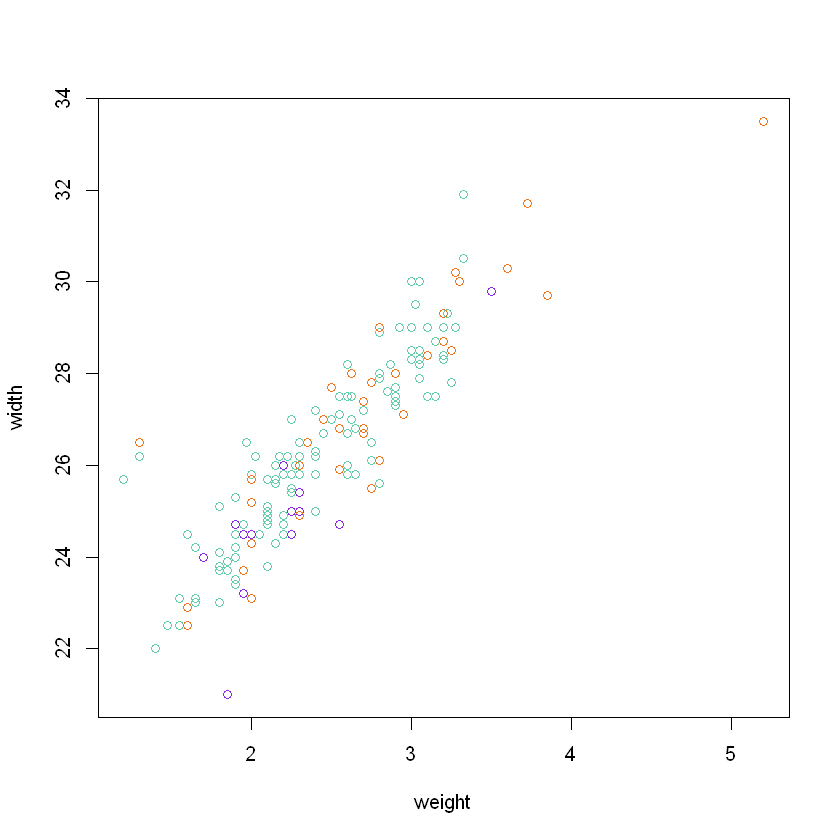

In [13]:
plot(data.raw$width ~ data.raw$weight, type = 'p', col = 'white', ylab = 'width', xlab = 'weight')
points(x = data.raw$weight[data.raw$spine == 3], y = data.raw$width[data.raw$spine == 3], col = 'aquamarine3', type = 'p')
points(x = data.raw$weight[data.raw$spine == 2], y = data.raw$width[data.raw$spine == 2], col = 'blueviolet', type = 'p')
points(x = data.raw$weight[data.raw$spine == 1], y = data.raw$width[data.raw$spine == 1], col = 'chocolate2', type = 'p')

### Transformation of variables?

In [63]:
data.test = data.frame(data.raw)

In [65]:
data.test$logwidth = log(data.test$width)

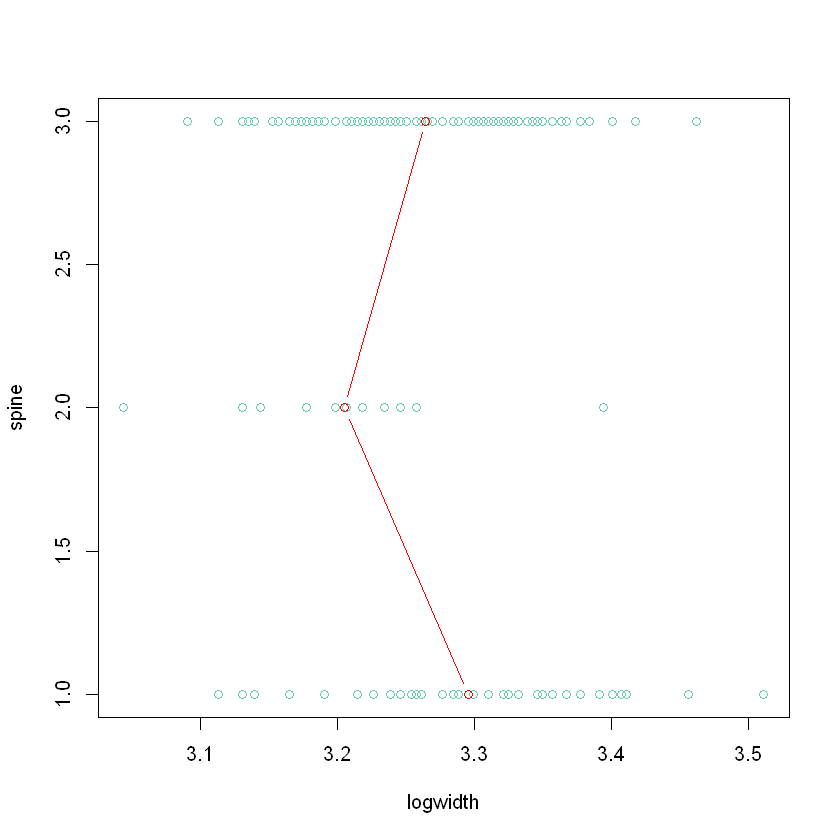

In [67]:
plot(data.test$spine ~ data.test$logwidth, type = 'p', col = 'aquamarine3', ylab = 'spine', xlab = 'logwidth')
points(x = c(mean(data.test$logwidth[data.test$spine == 3]), mean(data.test$logwidth[data.test$spine == 2]), mean(data.test$logwidth[data.test$spine == 1])), y = c(3, 2, 1), type = 'b', col = 'red')

Not very useful either